FileNotFoundError: [Errno 2] No such file or directory: '../data/superstore.csv'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("data/superstore.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'data/superstore.csv'

In [3]:
import os
os.getcwd()


'C:\\Users\\mdism\\Documents\\Sales_Forecasting_Project'

In [4]:
import os
os.listdir()


['.ipynb_checkpoints', 'data', 'notebook', 'output', 'sales_forecasting.ipynb']

In [5]:
os.listdir("data")


['.ipynb_checkpoints', 'superstore..csv']

In [6]:
df = pd.read_csv("data/superstore.csv")
df.head()



UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 2944: invalid start byte

In [7]:
df = pd.read_csv("data/superstore.csv", encoding="latin1")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values('Order Date')



In [9]:
monthly_sales = (
    df.resample('M', on='Order Date')['Sales']
    .sum()
    .reset_index()
)
monthly_sales.head()


C:\Users\mdism\AppData\Local\Temp\ipykernel_34588\3855947767.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M', on='Order Date')['Sales']


,Order Date,Sales
0,2014-01-31,14236.895
1,2014-02-28,4519.892
2,2014-03-31,55691.009
3,2014-04-30,28295.345
4,2014-05-31,23648.287


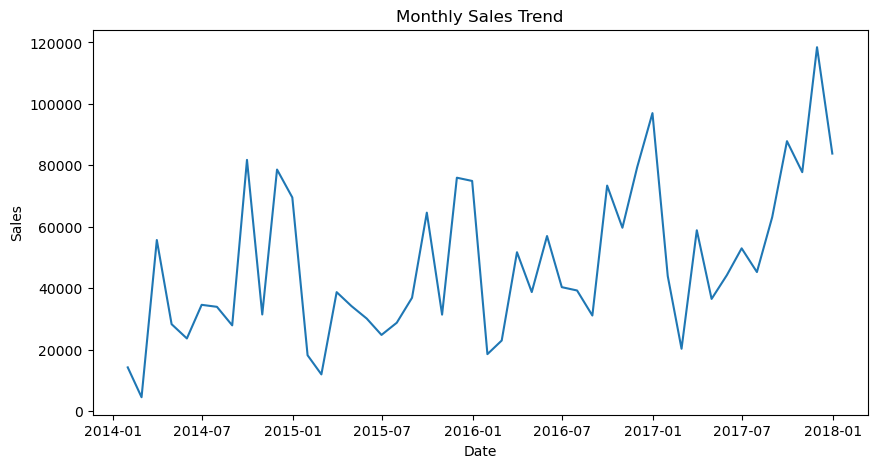

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'])
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [11]:
from prophet import Prophet

prophet_df = monthly_sales.rename(
    columns={"Order Date": "ds", "Sales": "y"}
)

prophet_df.head()


,ds,y
0,2014-01-31,14236.895
1,2014-02-28,4519.892
2,2014-03-31,55691.009
3,2014-04-30,28295.345
4,2014-05-31,23648.287


In [12]:
model = Prophet()
model.fit(prophet_df)


19:17:50 - cmdstanpy - INFO - Chain [1] start processing
19:17:53 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


C:\Users\mdism\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds,yhat,yhat_lower,yhat_upper
55,2018-08-31,61936.117127,53057.774720,71075.748281
56,2018-09-30,98895.786380,89806.773585,108232.293872
57,2018-10-31,67553.702965,58131.409585,77263.315712
58,2018-11-30,109972.726308,101004.708338,118593.910149
59,2018-12-31,101864.689950,92404.371650,111107.881350


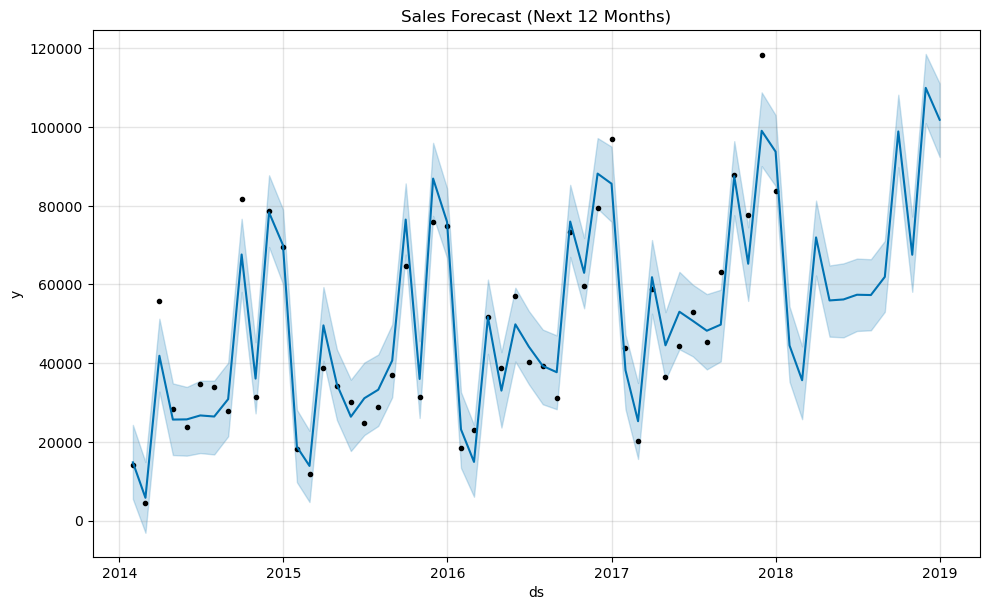

In [14]:
model.plot(forecast)
plt.title("Sales Forecast (Next 12 Months)")
plt.show()


In [15]:
future = model.make_future_dataframe(periods=12, freq='ME')


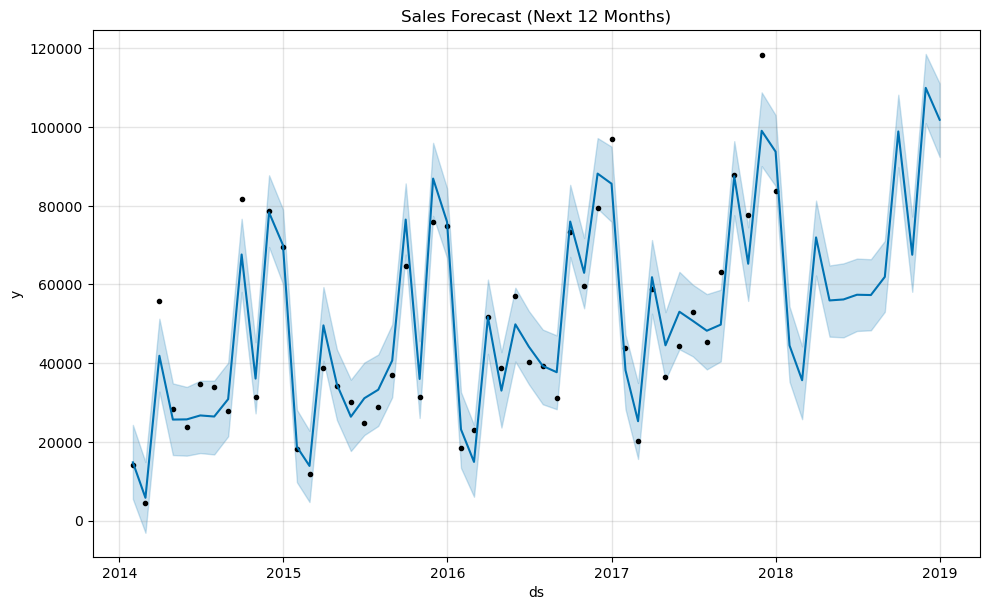

In [16]:
import matplotlib.pyplot as plt

model.plot(forecast)
plt.title("Sales Forecast (Next 12 Months)")
plt.show()


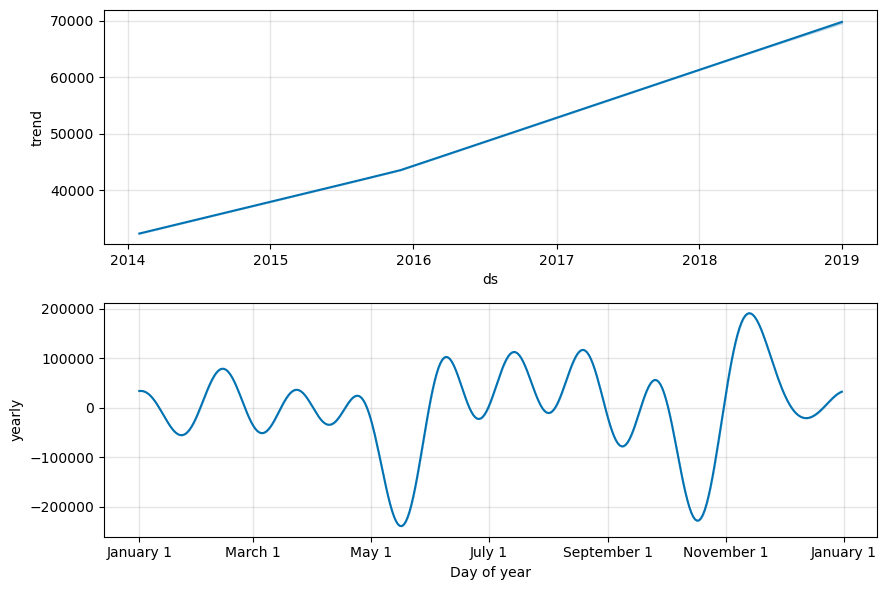

In [17]:
model.plot_components(forecast)
plt.show()


In [18]:
forecast.to_csv("output/sales_forecast.csv", index=False)
